# Modeling, exploring, and plotting M&M color frequencies: II

M&M candies are made in several different colors, and their abundances in each package can be dictated by statistics. 

## Sampling M&M colors from a distribution

Suppose we sample M&M colors from some made-up distribution. Let's generate some counts of different colored MMs and put the data in an R data strucrure called a matrix.

If we turn on the simpleDist variable:
* We leave it to R to fabricate these counts: for each, we take 10 randomly-sampled numbers between 0 and 6.

Otherwise:
* We weight the distributions a little bit.

In either case, we want n observations, where each consists of a "package" of M&Ms whose colors have different abundances.

Change the value of simpleDist (TRUE/FALSE) to change the distribution weighting.

In [91]:
# clear all variables in the workspace
rm(list=ls())

# Here, change the value of simpleDist (TRUE/FALSE) to change the distribution weighting.
simpleDist=FALSE;

# Number of observations
n = 1000;

if (simpleDist==TRUE) {
  red <- sample(0:6, n, replace=TRUE)
  blue <- sample(0:6, n, replace=TRUE)
  green <- sample(0:6, n, replace=TRUE)
  yellow <- sample(0:6, n, replace=TRUE)
  orange <- sample(0:6, n, replace=TRUE)
  brown <- sample(0:6, n, replace=TRUE)
    
} else {
    
  # or we can play with the distributions a bit...

  probVec1 <- c(0.1, 0.15, 0.3, 0.25, 0.15, 0.05, 0.0); # opposite of brown; skewed low
  red <- sample(0:6, n, prob=probVec1, replace=TRUE)
  
  probVec2 <- c(0.1, 0.15, 0.25, 0.25, 0.15, 0.05, 0.05); # skewed slightly low
  blue <- sample(0:6, n, prob=probVec2, replace=TRUE)
  
  probVec3 <- c(0.05, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05);
  green <- sample(0:6, n, prob=probVec3, replace=TRUE)
  
  probVec4 <- c(0.05, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05);
  yellow <- sample(0:6, n, prob=probVec4, replace=TRUE)
  
  probVec5 <- c(0.05, 0.05, 0.15, 0.25, 0.3, 0.15, 0.05);
  orange <- sample(0:6, n, prob=probVec5, replace=TRUE) #skewed slightly high
  
  probVec6 <- c(0.0, 0.05, 0.15, 0.25, 0.3, 0.15, 0.1); # skewed high
  brown <- sample(0:6, n, prob=probVec6, replace=TRUE)
}

Now we put the observations into a matrix called 'mm', for easy handling:

In [92]:
# names of the colors, to name the matrix columns:
mmc = c("red", "blue", "green", "yellow", "orange", "brown")     

# create a matrix of observations, the better to plot them using boxplot()
mm = matrix( data=c(red, blue, green, yellow, orange, brown), # use the data generated above 
             nrow=n,                      # create 10 rows
             ncol=6,                      # create 6 columns
             byrow=FALSE,                 # fill the matrix by column            
             # associate the color names (as column names) with the matrix:
             dimnames=list(c(1:n),mmc) ) # names of the dimensions: rows, then columns

### Histograms of color frequency over all the MM samples

Do the plots you see here depend upon the setting of the simpleDist variable above?

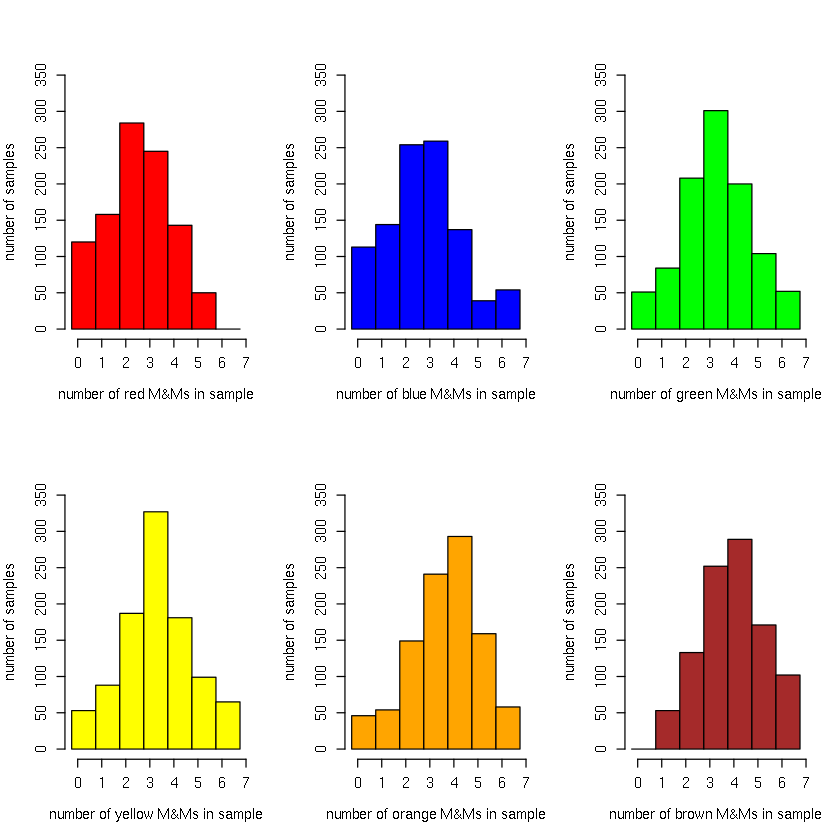

In [94]:
# note: enforce the same range for all plots, for direct comparison

# Stack the plots in a grid with two rows and three columns
par(mfrow=c(2,3))

# Loop over the columns of the mm matrix (the colors of the MMs)
for (i in 1:6) {
  
  xLabel=paste("number of", mmc[i], "M&Ms in sample")  # x label
    
  hist(mm[,i],                                         # data to plot
       ylab="number of samples",                       # y axis label
       ylim=c(0,350),                                  # enforce same y axis limit for all plots
       xlab=xLabel,                                    # display x label
       main=" ",                                       # suppress the title
       col=c(mmc[i]),                                  # color of the histogram bars--constant per plot
       breaks=c(-0.25:7.5),                            # location of the bins (as vector)
       include.lowest=FALSE)                             
} 

### Barplots of color abundances per sample

Now let's look at (some) of the distributions, on a single plot:

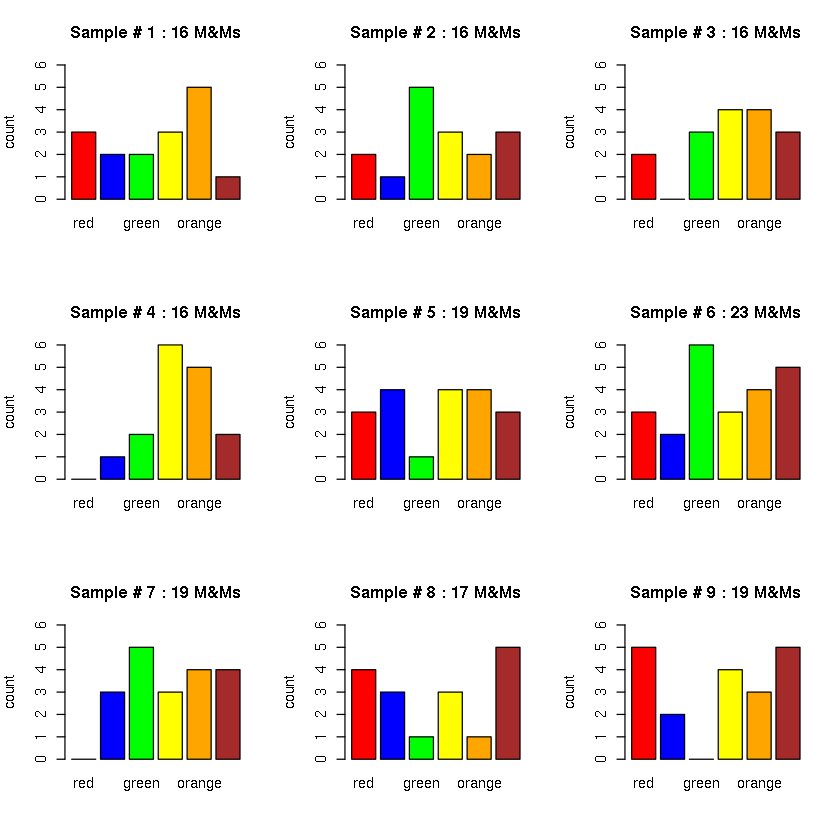

In [95]:
# put 3 columns, 3 rows of plots in one:
par(mfrow=c(3,3))

# make barplot for 9 samples:
for (i in 1:9) {
  barplot(mm[i,],                  # data to plot
          ylim=c(0,max(mm)),       # enforce same y range for all plots
          names.arg=mmc,           # names along the x axis
          col=mmc,                 # colors for the bars
          ylab="count",            # y label
          main=paste("Sample #",i, ":", sum(mm[i,]), "M&Ms"))  # main title
}

# restore default: one plot per page
par(mfrow=c(1,1))

## The mm matrix

Remember that each observation in the mm matrix represents one package of M&Ms. Let's look at:

* first 10 observations
* 'mm' matrix structure
* rownames
* colnames 

In [96]:
# print the first 10 rows of data (first 10 observations, or samples):
mm[1:10,]

,red,blue,green,yellow,orange,brown
1,3,2,2,3,5,1
2,2,1,5,3,2,3
3,2,0,3,4,4,3
4,0,1,2,6,5,2
5,3,4,1,4,4,3
6,3,2,6,3,4,5
7,0,3,5,3,4,4
8,4,3,1,3,1,5
9,5,2,0,4,3,5
10,2,3,3,6,4,6


In [97]:
# print the structure of the mm data object. We can see the 1000 rows (observations), with 6 colors for each one.
str(mm)

 int [1:1000, 1:6] 3 2 2 0 3 3 0 4 5 2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:1000] "1" "2" "3" "4" ...
  ..$ : chr [1:6] "red" "blue" "green" "yellow" ...


In [98]:
# print the first 10 row names of the mm data object. These just label the observations:
rownames(mm)[1:10]

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [99]:
# print the column names of the mm data object. These are the color names:
colnames(mm)

[1] "red"    "blue"   "green"  "yellow" "orange" "brown"

## Descriptive statistics of the M&M data

Now for a little descriptive statistics. We'll check:
* count of each color in an average package
* overall statistical summary
* average count of MMs per package

In [100]:
# How many of each MM in an average package? We want the mean by column:
colMeans(mm)

red   blue  green yellow orange  brown 
 2.283  2.496  3.035  3.052  3.390  3.698

In [101]:
# Statistical summary of the whole dataset, by MM color:
summary(mm)

      red             blue           green           yellow          orange    
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.00  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:3.00  
 Median :2.000   Median :2.000   Median :3.000   Median :3.000   Median :4.00  
 Mean   :2.283   Mean   :2.496   Mean   :3.035   Mean   :3.052   Mean   :3.39  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.00  
 Max.   :5.000   Max.   :6.000   Max.   :6.000   Max.   :6.000   Max.   :6.00  
     brown      
 Min.   :1.000  
 1st Qu.:3.000  
 Median :4.000  
 Mean   :3.698  
 3rd Qu.:5.000  
 Max.   :6.000  

If there are other things you want to check about the matrix, try them!

### MM counts per package

Let's answer the question: How many MMs per package, on average? This is easy to do using the data structure.

In [102]:
# sum the count per package over all the rows
rsums <- rowSums(mm)

How many sums did we just take? Same number as the count of samples:

In [103]:
# How many rsums are there?
length(rsums)

[1] 1000

Print the first 10 of these rowSums:

In [104]:
# Print the first 10 of these rowSums. These are the counts of MMs in the first 10 "packages"
rsums[1:10]

1  2  3  4  5  6  7  8  9 10 
16 16 16 16 19 23 19 17 19 24

Now, to answer the question, find the mean of the rowSums of mm:

In [105]:
mean(rsums)

[1] 17.954

We can also look at the summary statistics on the summed rows. This is another way to find the count of candies in an average package.

In [106]:
summary(rsums)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   16.00   18.00   17.95   20.00   28.00 

#### Boxplot

A boxplot visualizes the summary statistics for the count of candies in a package:

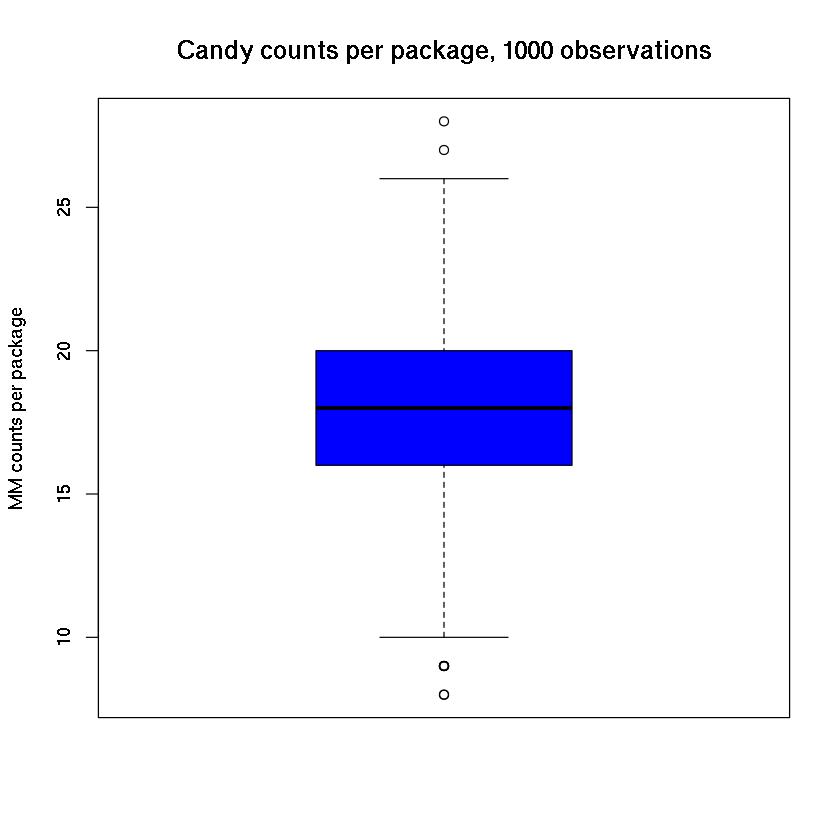

In [107]:
# reset the par() number of plots per window
par(mfrow=c(1,1), pch=1)

boxplot(rowSums(mm),
    ylab="MM counts per package",
    col="blue")
title(paste("Candy counts per package,",n,"observations"))

Notice that some unlucky person got only 8 MMs in their package, whereas somebody else got 27! (This is not a great model for quality control purposes.)

#### Scatterplot

Now, let's use a scatterplot to illustrate the number of MMs per package. On this, we *overplot* the *average* number of MMs per package.

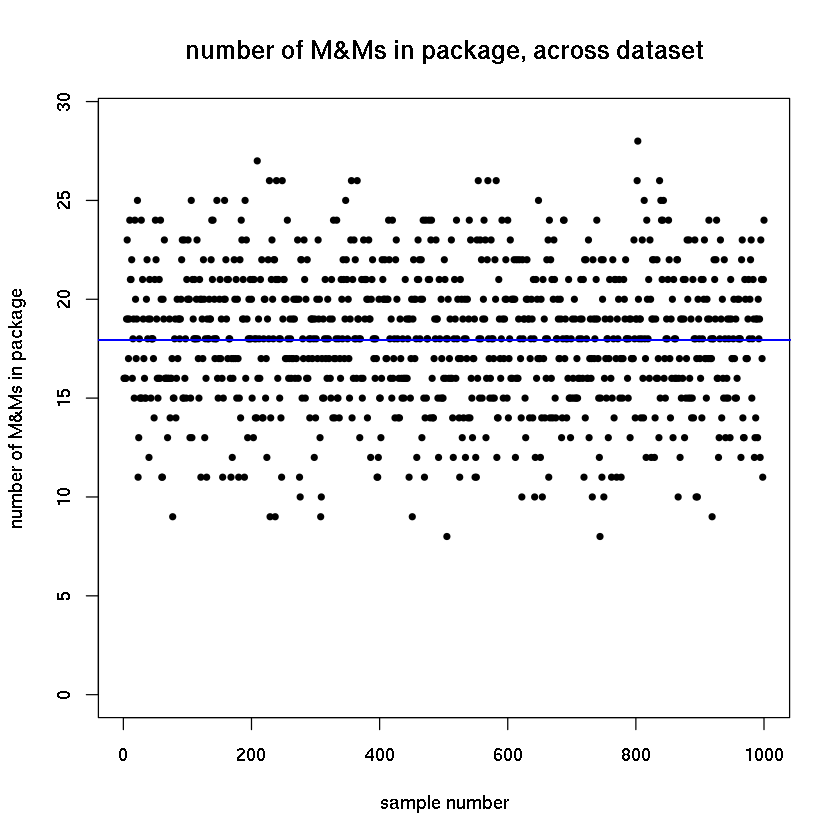

In [108]:
# scatterplot
plot(rsums,
     ylab="number of M&Ms in package", 
     xlab="sample number",
     pch=20,
     main="number of M&Ms in package, across dataset",
     ylim=c(0,max(rsums)+1))

# overplot with the mean of rowSums
mrsums <- mean(rsums)
abline(h=c(rep(mrsums,n)),col="blue")

How many MMs of each color are there per package, on average?

In [109]:
rmeans <- rowMeans(mm)
mean(rmeans)

# roughly, we mean:
round(mean(rmeans))

[1] 2.992333

[1] 3

You can try some more manipulations with the MM data, or generate some yourself.